In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
# Datos base
term_res = [0.60,0.75,0.73,0.71,0.69,0.66,0.65,0.62,0.60,0.58,0.55,0.53,0.50,0.48,0.46,0.44,0.42,0.40,0.38,0.36,0.34,0.32,0.30,0.28,0.26,0.24,0.22,0.20,0.18,0.16,0.14,0.12,0.10,0.09,0.08]
cap_res = [3.34,3.32,3.33,3.34,3.35,3.37,3.38,3.41,3.42,3.45,3.48,3.52,3.55,3.58,3.62,3.66,3.70,3.76,3.82,3.92,3.98,4.07,4.19,4.34,4.52,4.72,4.98,5.30,5.78,6.42,7.32,8.82,11.40,13.42,15.70]

b = 3950
term_tem = [b/np.log(i*(10**6)) for i in term_res]

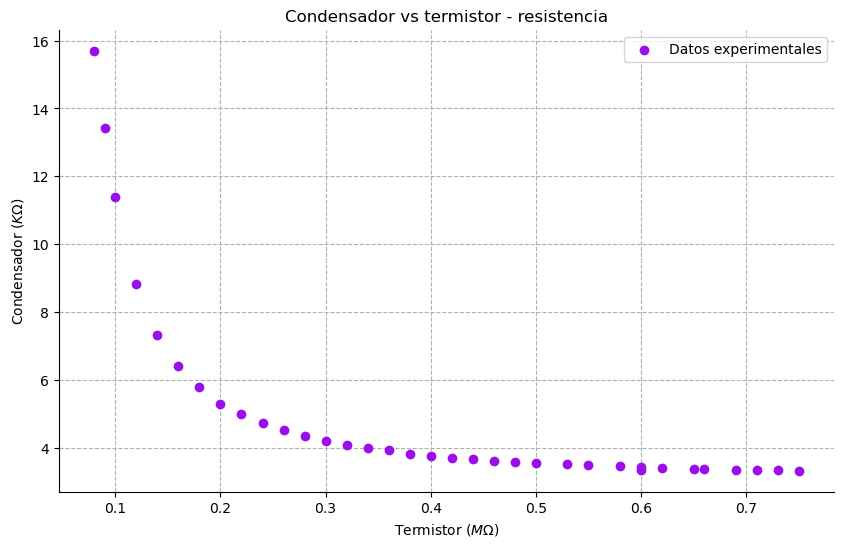

In [4]:
# Grafica Res-Res
plt.figure(figsize=(10,6))
plt.scatter(term_res,cap_res, color='xkcd:violet',marker='o', zorder=2, label='Datos experimentales')
# plt.plot(x, np.exp(y[1]+y[0]*x), color="xkcd:violet", zorder=1,
#          label=r"R(T) = $(3.43 \times 10^{10})e^{-4347 \cdot T^{-1}}$")
plt.ylabel(r"Condensador $(K \Omega)$")
plt.xlabel(r"Termistor $(M \Omega)$")
plt.title("Condensador vs termistor - resistencia")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(axis='both', linestyle="--")
plt.legend()
plt.savefig('Capacitor res.png', dpi=300)
plt.show()

In [6]:
# Ajuste
def fun(x,a,b,c):   return a * np.exp(-b * (1/x)) + c

popt, pcov = curve_fit(fun, term_tem, cap_res)
x = np.linspace(term_tem[1],term_tem[-1],100)

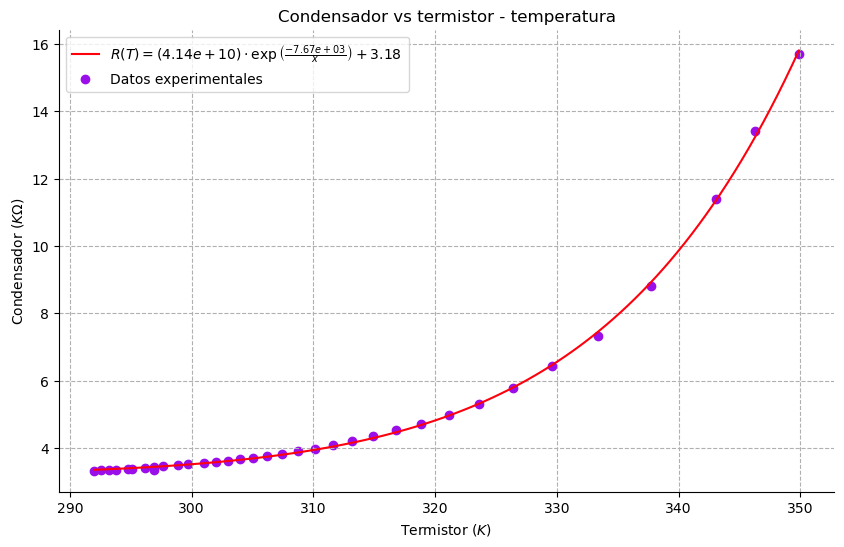

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(term_tem,cap_res, color='xkcd:violet',marker='o', zorder=1, label='Datos experimentales')
plt.plot(x, fun(x, *popt), color="xkcd:bright red", zorder=2,
        label=rf"$R(T) = ({popt[0]:.2e}) \cdot \exp{{\left ( \frac{{-{popt[1]:.2e}}}{{x}} \right )}} + {popt[2]:.2f}$ ")
plt.ylabel(r"Condensador $(K \Omega)$")
plt.xlabel(r"Termistor $(K)$")
plt.title("Condensador vs termistor - temperatura") 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(axis='both', linestyle="--")
plt.legend()
plt.savefig('Capacitor temp.png', dpi=300)
plt.show()